<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793509/blob/main/IBM%20-%20Data%20Analysis%20with%20Python/Semana%207%20-%20Data%20Analysis%20with%20Python%20(IBM)%20(M%C3%B3dulo%204).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

📅 Semana 7

🚀 Curso: Data Analysis with Python (IBM: DA0101EN)

📖 Módulo 4

Alberto José García Porras (**A01793509**)


---

☝ **Desarrollo de Modelos:**


Los modelos nos permiten entender la relación entre las variables de entrada (atributos independientes) de cara a la predicción de la variable de salida (atributo dependiente), de tal manera que podamos realizar predicciones de observaciones futuras a partir de los datos con los que contamos.

---

☝ **NOTA:** Estaré trabajando con la base de datos **website-trafficcsv** que mide el tráfico de usuarios que ingresa diariamente a un sitio web universitario.

---

👓 Siguiendo lo aprendido en el módulo 1 utilizaremos el método **read_csv()** de la librería **Pandas** para leer los datos e introducirlos en nuestro dataframe.

---

In [1]:
#Importamos la librería pandas y leemos el archivo website-traffic.csv
import pandas as pd
url = "https://openmv.net/file/website-traffic.csv"
df = pd.read_csv(url)
#Visualizamos los primeros 10 registros
df.head(10)

,DayOfWeek,MonthDay,Year,Visits
0,Monday,June 1,2009,27
1,Tuesday,June 2,2009,31
2,Wednesday,June 3,2009,38
3,Thursday,June 4,2009,38
4,Friday,June 5,2009,31
5,Saturday,June 6,2009,24
6,Sunday,June 7,2009,21
7,Monday,June 8,2009,29
8,Tuesday,June 9,2009,30
9,Wednesday,June 10,2009,22


---



☝**PARA TENER EN CUENTA:** Convertiremos los datos categóricos de la variable de entrada a numéricos con el fin de que podamos trabajar mejor nuestro ejercicio.

---


In [2]:
#Convertimos las dos variables de entrada que utilizaremos para nuestro ejercicio
df.DayOfWeek = pd.Categorical(df.DayOfWeek)
df['DayOfWeek'] = df.DayOfWeek.cat.codes

df.MonthDay = pd.Categorical(df.MonthDay)
df['MonthDay'] = df.MonthDay.cat.codes

print(df.head(10))

   DayOfWeek  MonthDay  Year  Visits
0          1        93  2009      27
1          5       104  2009      31
2          6       115  2009      38
3          4       117  2009      38
4          0       118  2009      31
5          2       119  2009      24
6          3       120  2009      21
7          1       121  2009      29
8          5       122  2009      30
9          6        94  2009      22


---

👣 **REGRESIÓN LINEAL SIMPLE:** Este método nos permite entender la relación entre dos variables, una de entrada llamada independiente (X) y otra de salida llamada dependiente o variable a predecir (Y). El resultado obtenido con este método será una función lineal que predice la respuesta (Y) en función de la variable predictora (X).
Su fórmula se expresa de la siguiente manera:
***Y^ = a + bX***
*   La variable **a** es igual a la intercepción de la regresión lineal o el valor de Y cuando X es igual a 0.
*   La variable **b** es igual a la pendiente de la regresión lineal o el valor con el que Y cambia cuando se incrementa 1 unidad en X.





---


🙌 **Manos a la obra !!!**

In [3]:
#Importamos el método de regresión lineal de la librería sklearn
from sklearn.linear_model import LinearRegression

#Asignamos a la variable LR el objeto del modelo a utilizar
LR = LinearRegression()

In [4]:
#Vamos a utilizar 'DayOfWeek' para predecir el número de visitas ('Visits') al sitio web.
#Capturamos nuestra variable independiente (X) y nuestra variable a predecir o dependiente (Y)
X = df[['DayOfWeek']]
Y = df['Visits']

#Ajustamos el modelo de regresión lineal simple para las variables X y Y
LR.fit(X, Y)

LinearRegression()

In [52]:
#Obtenemos la variable dependiente (Y)
Ypred=LR.predict(X)
Ypred[0:7]  

array([20.27109523, 24.15985098, 25.13203991, 23.18766204, 19.29890629,
       21.24328417, 22.2154731 ])



---


✍Ahora validamos la intercepción (**a**) y la pendiente (**b**) para validar nuestro modelo de regresión lineal según la formula indicada en la parte superior.


---

In [6]:
print("Nuestra intercepción (a) es: ", LR.intercept_)
print("Nuestra pendiente (b) es: ", LR.coef_)
print("Nuestro modelo LR es:")
print(LR.intercept_ + (LR.coef_ * + df['DayOfWeek']))

Nuestra intercepción (a) es:  19.298906294254778
Nuestra pendiente (b) es:  [0.97218894]
Nuestro modelo LR es:
0      20.271095
1      24.159851
2      25.132040
3      23.187662
4      19.298906
         ...    
209    22.215473
210    20.271095
211    24.159851
212    25.132040
213    23.187662
Name: DayOfWeek, Length: 214, dtype: float64


---

👣 **REGRESIÓN LINEAL MÚLTIPLE:** Este método es similar al anterior, la diferencia es que nos permite entender la relación entre una variable dependiente a predecir (Y) y diferentes variables independientes (X1, X2, X3, etc).El resultado obtenido con este método será una función lineal que predice la respuesta (Y) en función de la variable predictora (X).
Su fórmula se expresa de la siguiente manera:

***Y^ = a + b1X1 + b2X2 + b3X3 + b4X4***
*   La variable **a** es igual a la intercepción de la regresión lineal o el valor de Y cuando X es igual a 0.
*   La variable **b** es igual a la pendiente de la regresión lineal o el valor con el que Y cambia cuando se incrementa 1 unidad en X.





---



🙌 **Manos a la obra !!!**

In [7]:
#Vamos a utilizar 'DayOfWeek' y 'MonthDay' para predecir el número de visitas ('Visits') al sitio web.
#Capturamos nuestras variables independientes (X) y nuestra variable a predecir o dependiente (Y)
Xmr = df[['DayOfWeek', 'MonthDay']]
Y = df['Visits']

#Ajustamos el modelo de regresión lineal simple para las variables X y Y
LR.fit(Xmr, Y)

LinearRegression()


---


✍Ahora validamos la intercepción (**a**) y la pendiente (**b**) para identificar las variables de nuestro modelo de regresión lineal múltiple según la formula indicada en la parte superior.


---

In [8]:
print("Nuestra intercepción (a) es: ", LR.intercept_)
print("Nuestra pendiente (b) es: ", LR.coef_)

Nuestra intercepción (a) es:  14.598158221009173
Nuestra pendiente (b) es:  [0.96930251 0.04422029]


---

👣 **EVALUAR MODELOS UTILIZANDO HERRAMIENTAS DE VISUALIZACIÓN:** Este mecanismo facilita la visualización en los resultados del modelo, de tal forma que podamos realizar el afinamiento requerido con el fin de mejorar progresivamente el desempeño del modelo.





---


**📊 Plot de Regresión:** Esta herramienta mostrará una combinación de puntos de datos dispersos y la línea de regresión lineal ajustada a través de los datos. De esta forma, obtendremos una estimación razonable de la relación existente entre dos variables, así como también si la corelación es fuerte y la dirección de dicha correlación (positiva o negativa).

In [22]:
#Primero cargamos las librerias requeridas para este tipo de graficación
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

(0.0, 50.25)

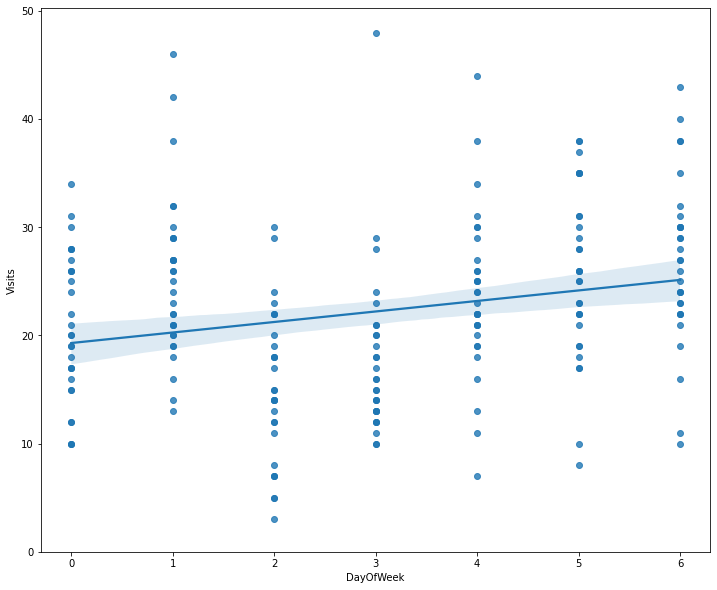

In [10]:
#Generamos el plot de regresión lineal para la variable 'DayOfWeek'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="DayOfWeek", y="Visits", data=df)
plt.ylim(0,)

(0.0, 50.25)

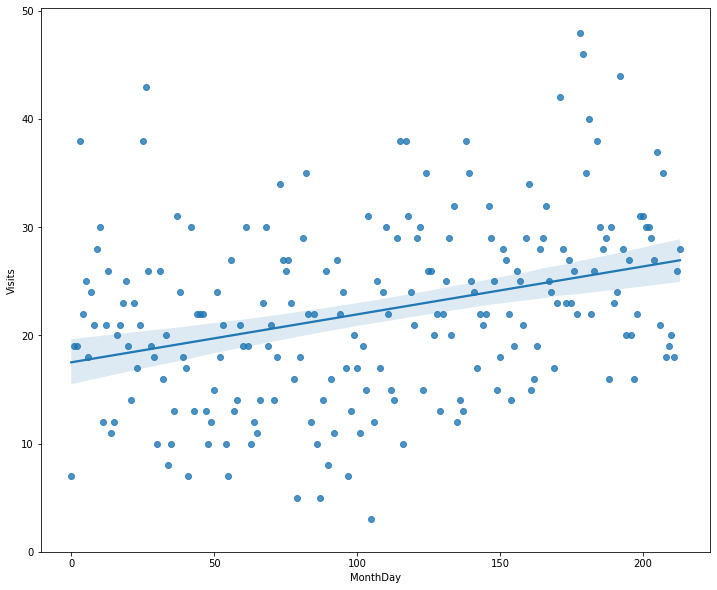

In [11]:
#Generamos el plot de regresión lineal para la variable 'MonthDay'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="MonthDay", y="Visits", data=df)
plt.ylim(0,)



---


✍ Las dos gráficas muestran una correlación positiva entre las variables independientes y la dependiente, ya que a medida que aumentan los valores de 'DayOfWeek' y 'MonthDay' aumentan las visitas. Por otra parte, vemos que para 'MonthDay' los puntos de los datos están mucho más cerca de la línea de regresión que con 'DayOfWeek', lo que nos daría a entender que con esta variable ('MonthDay') funciona mejor nuestro modelo de regresión lineal para realizar las predicciones. De hecho, lo corroboraremos con la matriz de correlación a continuación.


---



In [12]:
df[["DayOfWeek","MonthDay","Visits"]].corr()

,DayOfWeek,MonthDay,Visits
DayOfWeek,1.000000,0.002116,0.234178
MonthDay,0.002116,1.000000,0.329131
Visits,0.234178,0.329131,1.000000


---


ℹ Tal como lo mostraron los plot de regresión la variable '**MonthDay**' muestra una mayor correlación con la variable a predecir '**Visits**':

*   Correlación 'MonthDay' - 'Visits': **0.329131**
*   Correlación 'DayOfWeek' - 'Visits': **0.234178**


---

**📊 Plot Residual:** El residuo es la diferencia entre el valor observado (y) y la variable a predecir (y^), o en otra palabras, es la distancia entre el punto del dato y la linea de regresión ajustada. Por lo tanto, esta herramienta nos mostrará los residuos en el eje vertical Y y las variables independientes en el eje X.

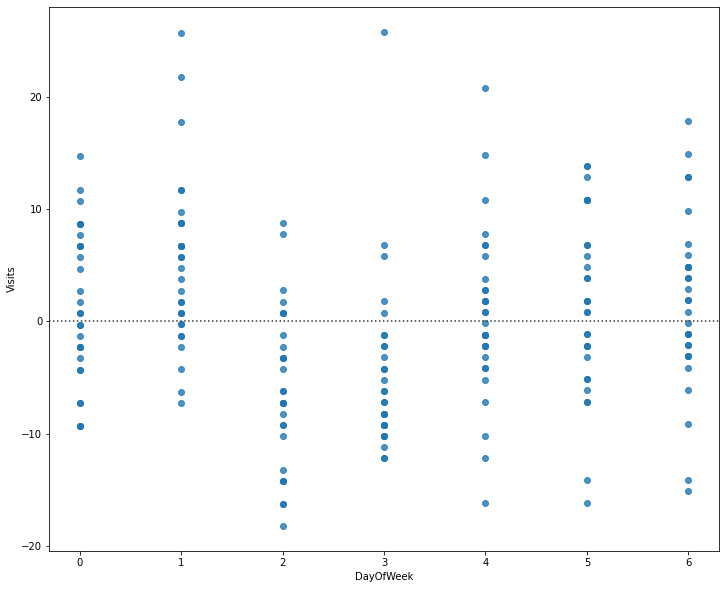

In [13]:
#Generamos el plot residual para la variable 'DayOfWeek'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['DayOfWeek'],y=df['Visits'])
plt.show()

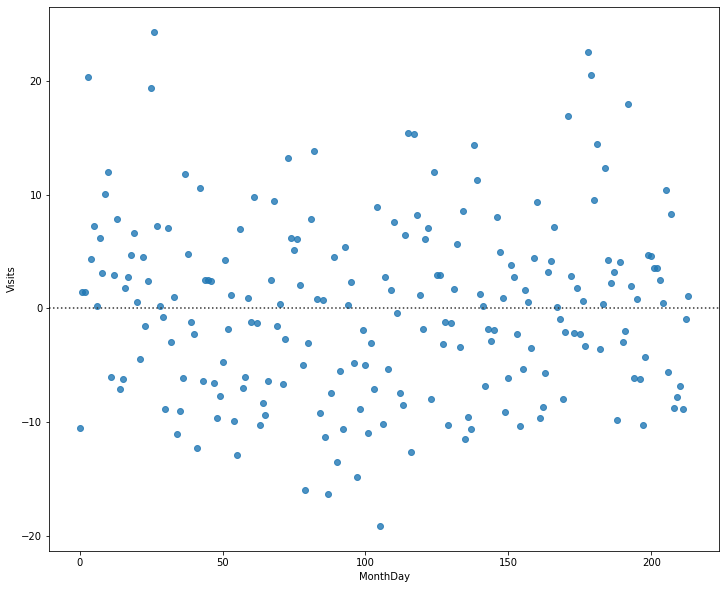

In [14]:
#Generamos el plot residual para la variable 'MonthDay'.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['MonthDay'],y=df['Visits'])
plt.show()



---


✍ Teniendo en cuenta que en este tipo de gráficos, cuando los puntos se encuentran esparcidos aleatoriamente alrededor del eje X se considerará un buen modelo, observamos que con la variable 'MonthDay' obtenemos mejores resultados y nos podría servir un modelo de regresión lineal, caso contrario al mostrado con la variable 'DayOfWeek'.


---

**📊 Plot de Distribución:** Cuando queremos visualizar la gráfica para regresión múltiple, esta herramienta es la adecuada, ya que nos muestra la distribución de los valores ajustados que resultan del modelo y nos permite compararlos con la distribución de los valores actuales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


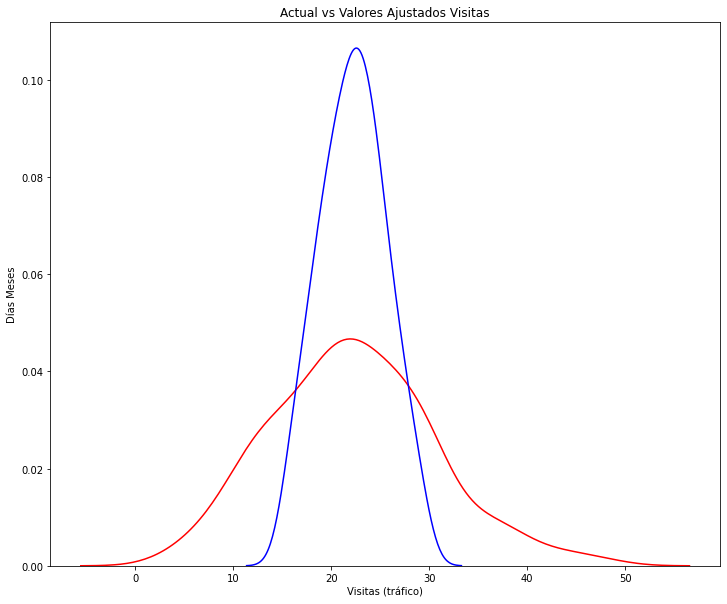

In [18]:
Ypred=LR.predict(Xmr)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Visits'], hist=False, color="r", label="Actual Value")
sns.distplot(Ypred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Valores Ajustados Visitas')
plt.xlabel('Visitas (tráfico)')
plt.ylabel('Días Meses')

plt.show()
plt.close()

---

👣 **REGRESIÓN POLINOMIAL:** Este es un caso particular de los modelos de regresión lineal simple o múltiple, en el cual obtenemos relaciones no lineales con el cuadrado o con el ajuste en términos de alto valor de las variables predictoras.




---

In [19]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Ajuste Polinomial con Matplotlib para Visitas ~ Días')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Visitas (tráfico)')

    plt.show()
    plt.close()

          3         2
-0.07954 x + 1.308 x - 4.182 x + 22.76


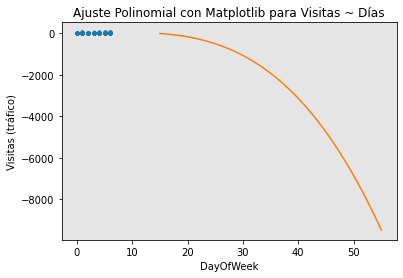

In [26]:
x = df['DayOfWeek']
y = df['Visits']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'DayOfWeek')

---

👣 **PIPELINE:** Es una herramienta que nos permite simplificar los pasos que ejecutaremos para el procesamiento de los datos.




---

In [28]:
#Importamos las librerías
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [29]:
#El pipeline se declara utilizando Tuples que incluyen el nombre del modelo o estimador y su función constructora.
Entrada =[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Mi_Pipe=Pipeline(Entrada)
print("Así se ve nuestro pipeline:", Mi_Pipe)

Así se ve nuestro pipeline: Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])


In [31]:
#Aplicamos el pipeline
Xmr = Xmr.astype(float)
Mi_Pipe.fit(Xmr,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [33]:
#Ahora vamos a normalizar los datos, ejecutar la transformación y realizar la predicción.
yPipe=Mi_Pipe.predict(Xmr)
yPipe[0:4]

array([18.17776965, 22.62151018, 26.80144885, 20.45079146])

---

👣 **MEDIDAS PARA EVALUACIÓN IN-SAMPLE:** Estas herramientas nos permiten analizar los resultados en términos cuantitativos para evaluar el desempeño del modelo. Las medidas más importantes son:

*   **R^2 / R-squared**: Indica cuan cerca está la data de la línea de regresión ajustada.
*   **Mean Squared Error (MSE)**: Mide el promedio de los cuadrados de los errores.



---

---


✍ **Medidas para Regresión Lineal Simple**


---

In [36]:
#Fit de DayOfWeek
LR.fit(X, Y)
#Encontramos R^2
print('El R-square es: ', LR.score(X, Y))

Yhat=LR.predict(X)
print('El resultado de los primeros cuatro valores de predicción son: ', Yhat[0:4])

El R-square es:  0.05483915519583393
El resultado de los primeros cuatro valores de predicción son:  [20.27109523 24.15985098 25.13203991 23.18766204]


In [37]:
#Calculamos mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['Visits'], Yhat)
print('El mean square error de las visitas y el valor de predicción es: ', mse)

El mean square error de las visitas y el valor de predicción es:  65.30583449886821


---


✍ **Medidas para Regresión Lineal Múltiple**


---

In [38]:
#Fit de DayOfWeek y DayOfMonth
LR.fit(Xmr, Y)
#Encontramos R^2
print('El R-square es: ', LR.score(Xmr, Y))

Yhat=LR.predict(Xmr)
print('El resultado de los primeros cuatro valores de predicción son: ', Yhat[0:4])

El R-square es:  0.16284117088165273
El resultado de los primeros cuatro valores de predicción son:  [19.67994806 24.04358135 25.49930709 23.64914265]


---


✍ **Medidas para Ajuste Polinomial**


---

In [43]:
#Calculamos r_squared, aplicando la función r2_score para obtener R^2 de los datos y posteriomente el MSE
from sklearn.metrics import r2_score
r_squared = r2_score(Y, p(X))
print('El valor R-square es: ', r_squared)
print('El MSE es: ', mean_squared_error(df['Visits'], p(X)))

El valor R-square es:  0.11796682903456812
El MSE es:  60.94403148653003


---

🔚 **PREDICCIÓN Y TOMA DE DECISIONES:** Una vez ajustado el modelo, podemos realizar predicciones y evaluarlas a través de los plots previamente explicados, asimismo, con el apoyo de las métricas o medidas del desempeño podemos tomar la mejor decisión acerca del modelo óptimo para la predicción deseada.



---